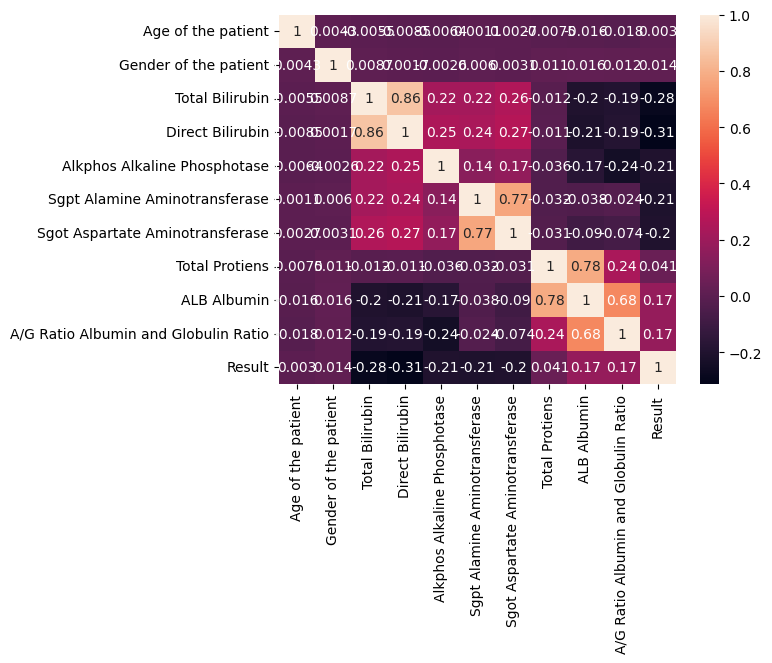

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the dataset
df = pd.read_csv('pd.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

# Select the top N correlated features with the target variable
N = 5
target_variable = 'Result'
top_features = corr_matrix.nlargest(N, target_variable)[target_variable].index

# Create a new dataset with only the selected features
new_df = df[top_features]


In [3]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('pd.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix using Plotly
fig = px.imshow(corr_matrix.values,
                x=corr_matrix.columns,
                y=corr_matrix.index,
                labels=dict(x="Features", y="Features", color="Correlation"),
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1)
fig.show()

# Select the top N correlated features with the target variable
N = 5
target_variable = 'Result'
top_features = corr_matrix.nlargest(N, target_variable)[target_variable].index

# Create a new dataset with only the selected features
new_df = df[top_features]


In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('pd.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Select the top N correlated features with the target variable
N = 5
target_variable = 'Result'
top_features = corr_matrix.nlargest(N, target_variable)[target_variable].index

# Print the top N correlated features
print("Top", N, "correlated features with", target_variable, ":")
print(top_features)


                                      Age of the patient  \
Age of the patient                              1.000000   
Gender of the patient                           0.004272   
Total Bilirubin                                -0.005493   
Direct Bilirubin                               -0.008474   
Alkphos Alkaline Phosphotase                   -0.006406   
Sgpt Alamine Aminotransferase                   0.001135   
Sgot Aspartate Aminotransferase                 0.002657   
Total Protiens                                 -0.007460   
ALB Albumin                                    -0.015975   
A/G Ratio Albumin and Globulin Ratio           -0.018436   
Result                                          0.003046   

                                      Gender of the patient  Total Bilirubin  \
Age of the patient                                 0.004272        -0.005493   
Gender of the patient                              1.000000         0.008693   
Total Bilirubin                        

In [5]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('pd.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Split the dataset into features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Create a logistic regression object
logreg = LogisticRegression()

# Create a Recursive Feature Elimination object
rfe = RFE(estimator=logreg, n_features_to_select=5, step=1)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the selected features
print("Selected features:")
print(X.columns[rfe.support_])


c:\Users\Dell\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Dell\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Dell\miniconda3\lib\site-packages

Selected features:
Index(['Gender of the patient', 'Direct Bilirubin', 'Total Protiens',
       'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')


Variance explained by each principal component:
[0.27292501 0.19223841]


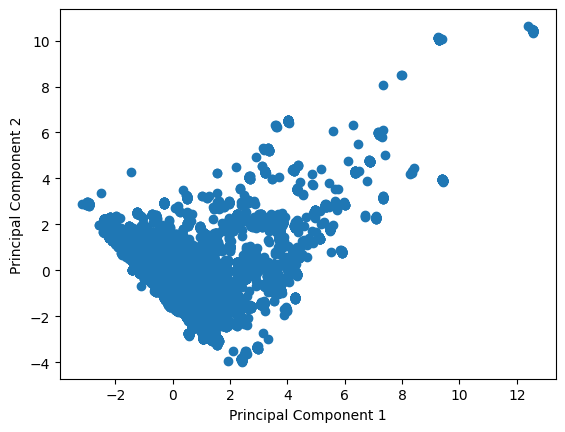

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('pd.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Split the dataset into features and target variable
X = df.drop('Result', axis=1)

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA object to the standardized data
X_pca = pca.fit_transform(X_std)

# Print the variance explained by each principal component
print("Variance explained by each principal component:")
print(pca.explained_variance_ratio_)

# Plot the principal components
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Load the dataset
df = pd.read_csv('pd.csv')

# Split the dataset into features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Create a linear regression object
lr = LinearRegression()

# Create a Sequential Feature Selector object
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='r2')

# Fit the SFS object to the data
sfs.fit(X, y)

# Print the selected features
print("Selected features:")
print(sfs.k_feature_names_)


Selected features:
('Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'A/G Ratio Albumin and Globulin Ratio')


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Load the dataset
df = pd.read_csv('pd.csv')

# Split the dataset into features and target variable
X = df.drop('Result', axis=1)
y = df['Result']

# Create a linear regression object
lr = LinearRegression()

# Create a Sequential Feature Selector object
sfs = SequentialFeatureSelector(lr, k_features=5, forward=False, scoring='r2')

# Fit the SFS object to the data
sfs.fit(X, y)

# Print the selected features
print("Selected features:")
print(sfs.k_feature_names_)


Selected features:
('Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Total Protiens', 'ALB Albumin')


In [9]:
import pandas as pd

# create a dataframe to store the model names and accuracy scores
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])



# train


In [10]:


from sklearn.model_selection import train_test_split

# create feature matrix X and target vector y
X = df.drop('Result', axis=1)
y = df['Result']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create an instance of the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# fit the model on the training data
dt.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dt.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# create a new row for the model and accuracy
new_row = {'Model': 'DecisionTreeClassifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)

# print the results dataframe
print(results_df)


Accuracy: 0.9954611474219317
                    Model  Accuracy
0           Random Forest  0.995461
1  DecisionTreeClassifier  0.995461


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\144219675.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create an instance of the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'RandomForestClassifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.9992737835875091


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\3556765429.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create an instance of the SVC classifier
svm = SVC(random_state=42)

# fit the model on the training data
svm.fit(X_train, y_train)

# make predictions on the testing data
y_pred = svm.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'SVC classifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.6733841684822077


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\445014162.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create an instance of the  classLogisticRegressionifier
lr = LogisticRegression(random_state=42)

# fit the model on the training data
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred = lr.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'classLogisticRegressionifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.6891793754538853


c:\Users\Dell\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\22024476.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# create an instance of the GaussianNB classifier
nb = GaussianNB()

# fit the model on the training data
nb.fit(X_train, y_train)

# make predictions on the testing data
y_pred = nb.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'GaussianNB classifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.6545025417574437


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\3436157707.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model on the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'KNeighborsClassifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.9573347857661583


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\1582360725.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# create an instance of the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# fit the model on the training data
gb.fit(X_train, y_train)

# make predictions on the testing data
y_pred = gb.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'GradientBoostingClassifier', 'Accuracy': accuracy}

# append the new row to the dataframe
results_df = results_df.append(new_row, ignore_index=True)


Accuracy: 0.8816267247639796


C:\Users\Dell\AppData\Local\Temp\ipykernel_3500\2433561666.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create an instance of the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'RandomForestClassifier', 'Accuracy': accuracy}


Accuracy: 0.9992737835875091


In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)

# fit the model on the training data
mlp.fit(X_train, y_train)

# make predictions on the testing data
y_pred = mlp.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
new_row = {'Model': 'MLPClassifier', 'Accuracy': accuracy}


Accuracy: 0.7282135076252724


In [30]:
print(results_df)

                          Model  Accuracy
0                 Random Forest  0.995461
1        DecisionTreeClassifier  0.995461
2        RandomForestClassifier  0.999274
3                SVC classifier  0.673384
4  classLogisticRegressionifier  0.689179
5         GaussianNB classifier  0.654503
6          KNeighborsClassifier  0.957335
7    GradientBoostingClassifier  0.881627


In [31]:
sorted_results_df = results_df.sort_values('Accuracy', ascending=False)
print(sorted_results_df)


                          Model  Accuracy
2        RandomForestClassifier  0.999274
0                 Random Forest  0.995461
1        DecisionTreeClassifier  0.995461
6          KNeighborsClassifier  0.957335
7    GradientBoostingClassifier  0.881627
4  classLogisticRegressionifier  0.689179
3                SVC classifier  0.673384
5         GaussianNB classifier  0.654503


In [32]:
sorted_results_df = sorted_results_df.drop(sorted_results_df[sorted_results_df['Model'] == 'Random Forest'].index)
print(sorted_results_df)


                          Model  Accuracy
2        RandomForestClassifier  0.999274
1        DecisionTreeClassifier  0.995461
6          KNeighborsClassifier  0.957335
7    GradientBoostingClassifier  0.881627
4  classLogisticRegressionifier  0.689179
3                SVC classifier  0.673384
5         GaussianNB classifier  0.654503


In [33]:
sorted_results_df = sorted_results_df.reset_index(drop=True)
print(sorted_results_df)


                          Model  Accuracy
0        RandomForestClassifier  0.999274
1        DecisionTreeClassifier  0.995461
2          KNeighborsClassifier  0.957335
3    GradientBoostingClassifier  0.881627
4  classLogisticRegressionifier  0.689179
5                SVC classifier  0.673384
6         GaussianNB classifier  0.654503


In [34]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create QDA model and fit on training data
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions on test data
y_pred = qda.predict(X_test)

# Calculate accuracy score on test data
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
print("Accuracy score for QDA model:", accuracy)
new_row = {'Model': 'qda', 'Accuracy': accuracy}


Accuracy score for QDA model: 0.644880174291939
